In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,PolynomialFeatures
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


<font size='8'>Data Cleaning</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
df.duplicated().sum()

0

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]  
    df[col] = df[col].fillna(most_frequent)

In [8]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

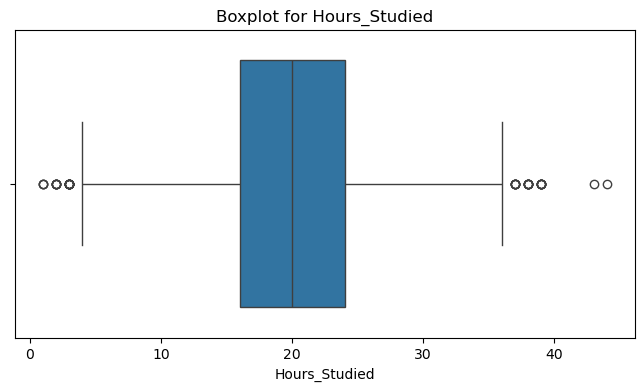

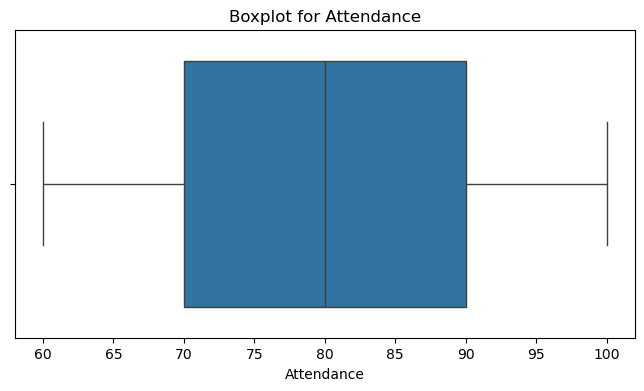

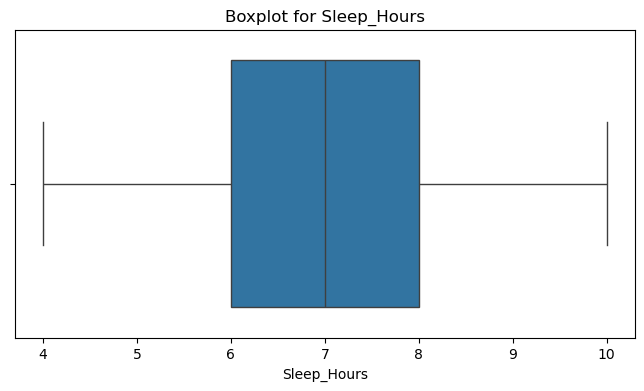

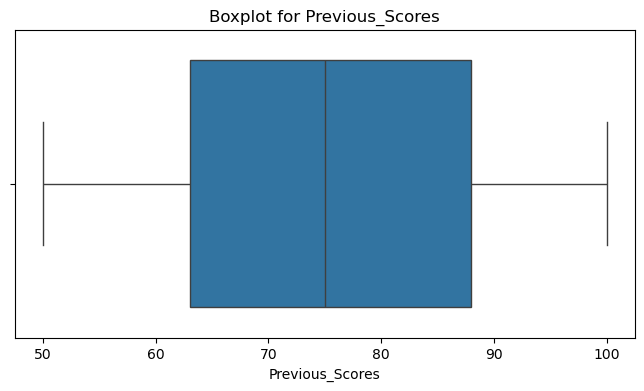

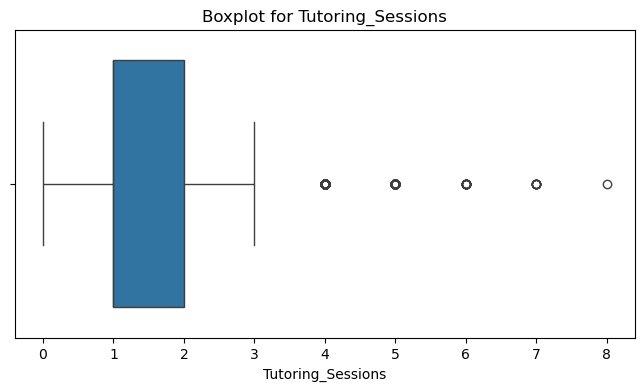

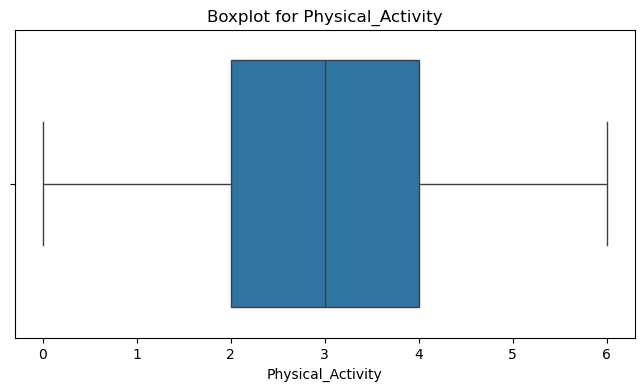

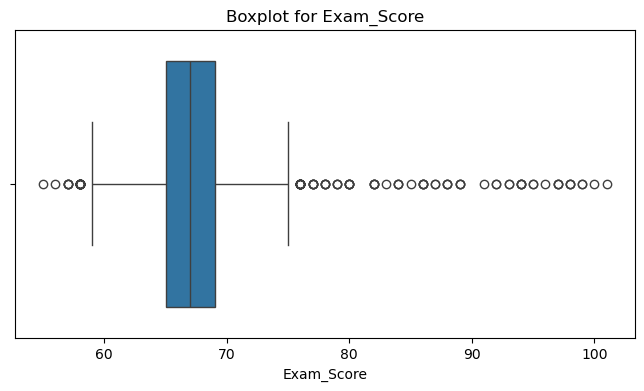

In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

<font size='8'>EDA</font>

In [13]:
text_cols = df.select_dtypes(include=['object']).columns
encoders = {}  

for col in text_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [14]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


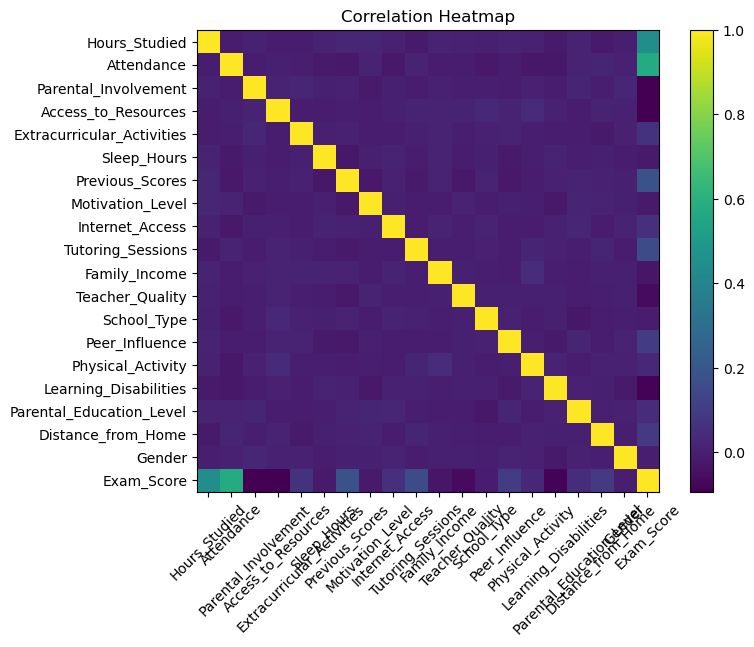

In [15]:
corr = df.corr()

# heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()

In [16]:
corr['Exam_Score'].sort_values(ascending=False)


Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.088934
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.044574
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.060824
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64

In [17]:
corr['Hours_Studied'].sort_values(ascending=False)

Hours_Studied                 1.000000
Exam_Score                    0.445455
Previous_Scores               0.024846
Motivation_Level              0.022092
Sleep_Hours                   0.010977
Family_Income                 0.010025
Peer_Influence                0.009698
Parental_Education_Level      0.008651
Parental_Involvement          0.007207
Internet_Access               0.005038
Physical_Activity             0.004624
Teacher_Quality               0.004417
School_Type                   0.000299
Gender                       -0.004241
Extracurricular_Activities   -0.006017
Access_to_Resources          -0.007909
Attendance                   -0.009908
Distance_from_Home           -0.013563
Tutoring_Sessions            -0.014282
Learning_Disabilities        -0.014401
Name: Hours_Studied, dtype: float64

In [18]:
df.drop('School_Type', axis=1, inplace=True)


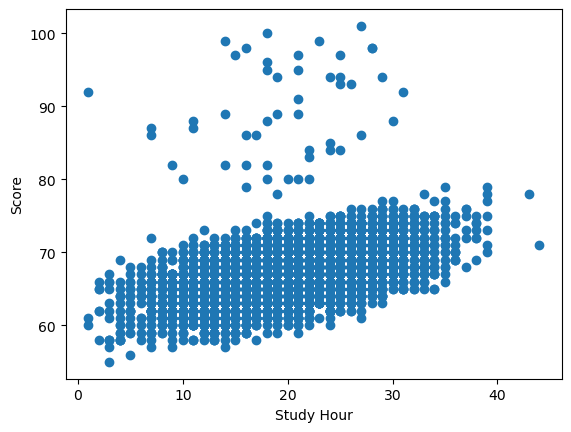

In [19]:
x = df['Hours_Studied']
y = df['Exam_Score']
plt.xlabel('Study Hour')
plt.ylabel('Score')

plt.scatter(x,y)

<font size='5'>Although the relationship appears linear, the data contains significant noise, indicating the presence of other influencing factors beyond study hours, which explains the relatively low R² score.</font>

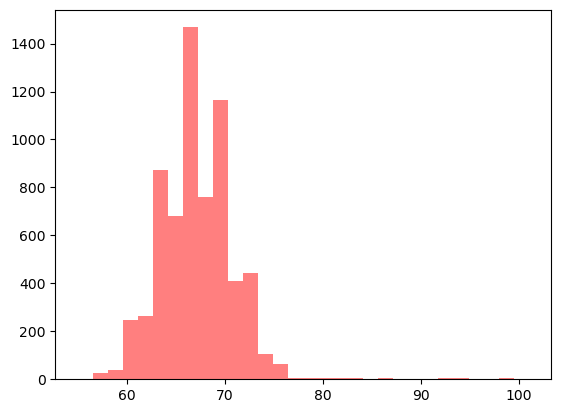

In [21]:
data = df['Exam_Score'] 
plt.hist(data, bins=30, alpha=0.5,
         histtype='barstacked',color='red')

plt.show()

<font size='5'>The majority of students’ exam scores are concentrated between 65 and 70, indicating a relatively narrow performance range with limited extreme high or low scores.</font>

In [23]:
gender_avg = df.groupby('Gender')['Exam_Score'].mean()


<Axes: xlabel='Gender'>

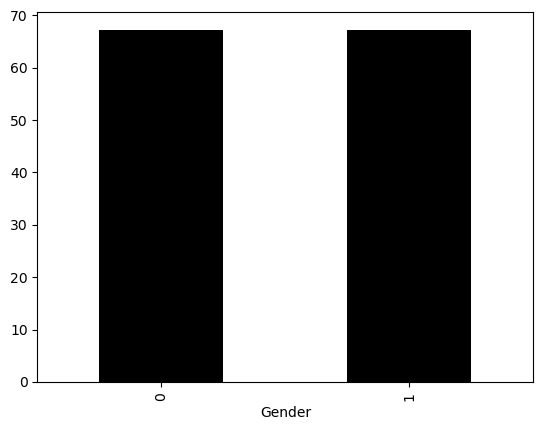

In [24]:
gender_avg.plot(kind='bar',color='black')

In [25]:
gender_avg

Gender
0    67.244898
1    67.228894
Name: Exam_Score, dtype: float64

<font size='5'>Gender does not appear to have a significant impact on exam scores, as performance levels are comparable between male and female students.</font>

In [27]:
data=df.groupby('Parental_Education_Level')['Exam_Score'].mean().sort_values()

<Axes: xlabel='Parental_Education_Level'>

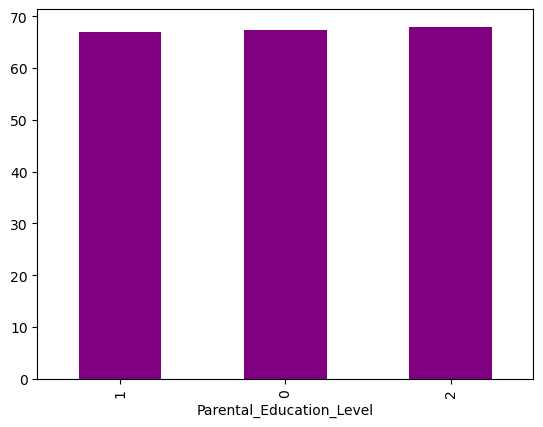

In [28]:
data.plot(kind='bar',color='purple')

In [29]:
data

Parental_Education_Level
1    66.897978
0    67.315737
2    67.970881
Name: Exam_Score, dtype: float64

<font size='5'>Parental education level does not show a significant relationship with students’ exam scores in this dataset.</font>

In [31]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,2,3,0,1,0,0,68


In [100]:
corr = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"Correlation: {corr:.2f}")

Correlation: 0.45


<font size='8'>Modeling</font>

In [33]:
x = df[['Hours_Studied']]
y = df['Exam_Score']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=0.2,random_state=42)

In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train , y_train)

LinearRegression()

In [37]:
y_pred = model.predict(x_test)

In [38]:
slope=model.coef_
print('slope:',slope)

slope: [0.28566874]


In [39]:
intercept=model.intercept_
print('intercept:',intercept)


intercept: 61.511167469044246


In [40]:
r2=r2_score(y_test ,y_pred)
print(f"R2 Score {r2}")

R2 Score 0.2319868674542105


In [41]:
MSE=mean_squared_error(y_test ,y_pred)
print(f"Mean Squared Error {MSE}")

Mean Squared Error 10.855921288793322


In [42]:
MAE=mean_absolute_error(y_test ,y_pred)
print(f"Mean Absolute Error {MAE}")

Mean Absolute Error 2.4475687452945643


In [43]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test_poly)

In [48]:
r2=r2_score(y_test ,y_pred)
print(f"R2 Score {r2}")

R2 Score 0.23276034442853466


In [49]:
MSE=mean_squared_error(y_test ,y_pred)
print(f"Mean Squared Error {MSE}")

Mean Squared Error 10.84498813570501


In [50]:
MAE=mean_absolute_error(y_test ,y_pred)
print(f"Mean Absolute Error {MAE}")

Mean Absolute Error 2.4447795821288105


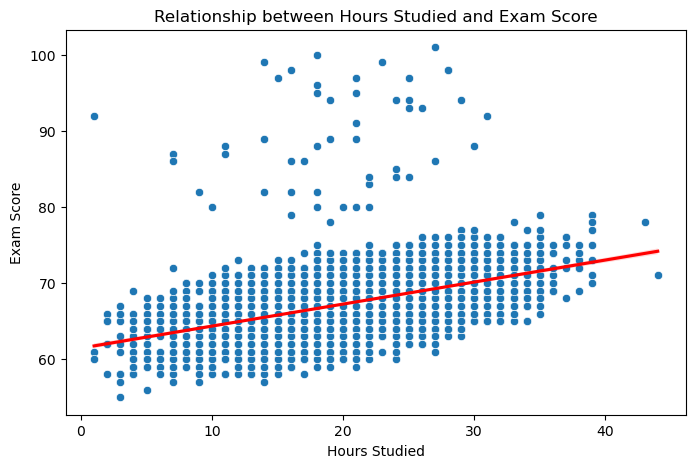

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'])
sns.regplot(x=df['Hours_Studied'], y=df['Exam_Score'], scatter=False, color='red')
plt.title("Relationship between Hours Studied and Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

<font size='10'>y=0.28566874x+61.511167469044246</font>

<font size='5'> ## 🔍 Students Performance Analysis </font>

<font size='4'>

The relationship between Hours Studied and Exam Score shows a *linear trend with moderate noise*.  
- Linear Regression achieved R² = 0.2319, Polynomial Regression R² = 0.2327.  
- The small improvement in Polynomial Regression indicates that adding complexity does not significantly enhance prediction due to noisy data.  
- The correlation between Hours Studied and Exam Score is moderate (r = 0.45), confirming the linear but noisy relationship.

</font>